# Fine-Scale Prediction of People's Home Location using Social Media Footprints

_**Authors:** Hamdi Kavak, Daniele Vernon-Bido, and Jose Padilla_

_**Submitted:** SBP-BRIMS 2018 on January 11, 2018._

## Feature set plot visualization

#### - Imports

In [1]:
### Fine-Scale Prediction of People's Home Location using Social Media Footprints ###########
# Author: Hamdi Kavak
# Created: December 31, 2017
#########################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn import metrics

#### - Load data and create training and testing set

In [3]:
## training_test_set.csv contains 78812 rows with properties and class of home/not home
df = pd.read_csv('data/training_test_set_anonymized.csv')

num_of_rows = len(df.index)
print num_of_rows, ' rows loaded.'


78812  rows loaded.


#### - Plot features

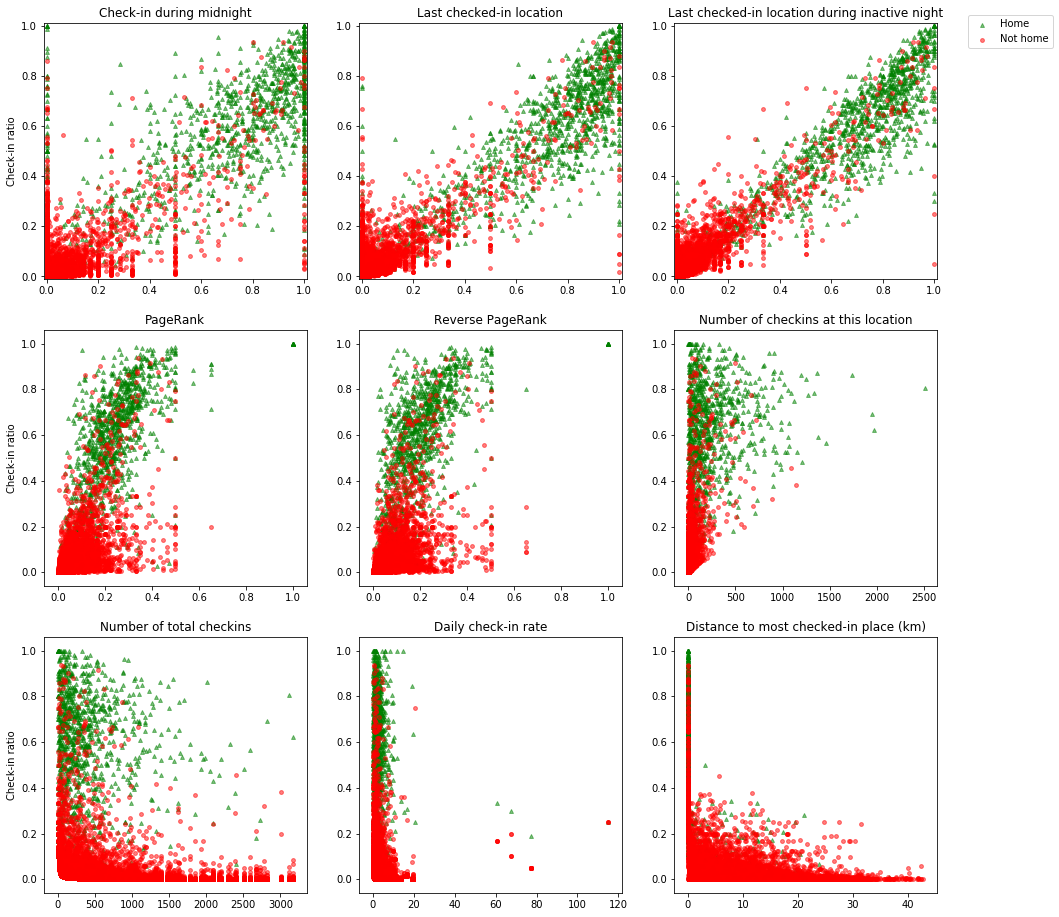

In [4]:
# FEATURES
# -----------------------
# checkin_ratio
# midnight_ratio
# end_of_day_ratio
# end_of_inactive_day_ratio
# page_rank
# reverse_page_rank
# num_of_total_checkins
# daily_total_checkin_rate
# kilometer_distance_to_most_checked_in


# create figures
fig = plt.figure(figsize=(16,16))

df_home = df.loc[df['is_home'] == True]
df_non_home = df.loc[df['is_home'] == False]

marker_size = 15.0
alpha = 0.5
home_color = 'g'
non_home_color = 'r'
home_marker='^'
non_home_marker='o'

# compare all features against checkin ratio

ax1 = fig.add_subplot(331)
ax1.scatter(df_home['midnight_ratio'],df_home['checkin_ratio'],c=home_color, s=marker_size, marker=home_marker, alpha=alpha)
ax1.scatter(df_non_home['midnight_ratio'],df_non_home['checkin_ratio'],c=non_home_color, s=marker_size, marker=non_home_marker, alpha=alpha)
ax1.set_title('Check-in during midnight')
ax1.set_ylabel('Check-in ratio')
ax1.set_xlim(0-0.01,1+0.01)
ax1.set_ylim(0-0.01,1+0.01)

ax2 = fig.add_subplot(332, sharey=ax1)
ax2.scatter(df_home['end_of_day_ratio'],df_home['checkin_ratio'],c=home_color, s=marker_size, marker=home_marker, alpha=alpha)
ax2.scatter(df_non_home['end_of_day_ratio'],df_non_home['checkin_ratio'],c=non_home_color, s=marker_size, marker=non_home_marker, alpha=alpha)
ax2.set_title('Last checked-in location')
ax2.set_xlim(0-0.01,1+0.01)
ax2.set_ylim(0-0.01,1+0.01)

ax3 = fig.add_subplot(333, sharey=ax1)
s1 = ax3.scatter(df_home['end_of_inactive_day_ratio'],df_home['checkin_ratio'],c=home_color, s=marker_size, marker=home_marker, alpha=alpha)
s2 = ax3.scatter(df_non_home['end_of_inactive_day_ratio'],df_non_home['checkin_ratio'],c=non_home_color, s=marker_size, marker=non_home_marker, alpha=alpha)
ax3.set_title('Last checked-in location during inactive night')
ax3.set_xlim(0-0.01,1+0.01)
ax3.set_ylim(0-0.01,1+0.01)
ax3.legend([s1,s2],['Home', 'Not home'],bbox_to_anchor=(1.1, 1.05))

ax4 = fig.add_subplot(334)
ax4.scatter(df_home['page_rank'],df_home['checkin_ratio'],c=home_color, s=marker_size, marker=home_marker, alpha=alpha)
ax4.scatter(df_non_home['page_rank'],df_non_home['checkin_ratio'],c=non_home_color, s=marker_size, marker=non_home_marker, alpha=alpha)
ax4.set_title('PageRank')
ax4.set_ylabel('Check-in ratio')
ax4.set_ylim(0-0.01,1+0.01)

ax5 = fig.add_subplot(335, sharey=ax4)
ax5.scatter(df_home['reverse_page_rank'],df_home['checkin_ratio'],c=home_color, s=marker_size, marker=home_marker, alpha=alpha)
ax5.scatter(df_non_home['reverse_page_rank'],df_non_home['checkin_ratio'],c=non_home_color, s=marker_size, marker=non_home_marker, alpha=alpha)
ax5.set_title('Reverse PageRank')

ax6 = fig.add_subplot(336, sharey=ax4)
ax6.scatter(df_home['number_of_checkins_at_this_location'],df_home['checkin_ratio'],c=home_color, s=marker_size, marker=home_marker, alpha=alpha)
ax6.scatter(df_non_home['number_of_checkins_at_this_location'],df_non_home['checkin_ratio'],c=non_home_color, s=marker_size, marker=non_home_marker, alpha=alpha)
ax6.set_title('Number of checkins at this location')

ax7 = fig.add_subplot(337)
ax7.scatter(df_home['num_of_total_checkins'],df_home['checkin_ratio'],c=home_color, s=marker_size, marker=home_marker, alpha=alpha)
ax7.scatter(df_non_home['num_of_total_checkins'],df_non_home['checkin_ratio'],c=non_home_color, s=marker_size, marker=non_home_marker, alpha=alpha)
ax7.set_title('Number of total checkins')
ax7.set_ylabel('Check-in ratio')
ax7.set_ylim(0-0.01,1+0.01)

ax8 = fig.add_subplot(338, sharey=ax7)
ax8.scatter(df_home['daily_total_checkin_rate'],df_home['checkin_ratio'],c=home_color, s=marker_size, marker=home_marker, alpha=alpha)
ax8.scatter(df_non_home['daily_total_checkin_rate'],df_non_home['checkin_ratio'],c=non_home_color, s=marker_size, marker=non_home_marker, alpha=alpha)
ax8.set_title('Daily check-in rate')

ax9 = fig.add_subplot(339, sharey=ax7)
ax9.scatter(df_home['kilometer_distance_to_most_checked_in'],df_home['checkin_ratio'],c=home_color, s=marker_size, marker=home_marker, alpha=alpha)
ax9.scatter(df_non_home['kilometer_distance_to_most_checked_in'],df_non_home['checkin_ratio'],c=non_home_color, s=marker_size, marker=non_home_marker, alpha=alpha)
ax9.set_title('Distance to most checked-in place (km)')


plt.show()